# Morpion Solitaire package documentation

This notebook contains some examples on how to use the library MorpionSolitaire.py, including running a random exploration as well as importing/exporting files

First thing: import the library:

In [1]:
from MorpionSolitaire import *

## Class `Grid`

The first important class is called `Grid`

In [2]:
grid = Grid()

A grid is an array of 22x22 cells, each consisting in
- a point
- an horizontal line
- a vertical line
- two diagonal lines

In [3]:
grid.dimension

22

In [4]:
grid.cell.shape

(22, 22, 5)

The method `print()` displays the grid using `matplotlib`

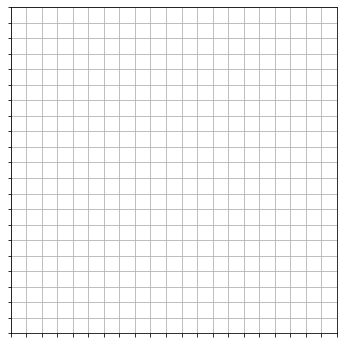

In [5]:
grid.print()

By default the constructor defines an empty grid.
But there are also some pre-defined grids that will be the starting configurations for the game

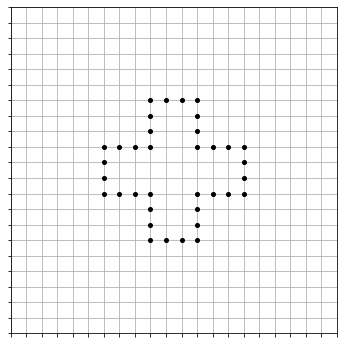

In [6]:
grid = Grid('cross')
grid.print()

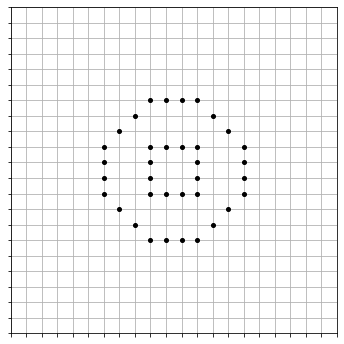

In [7]:
grid = Grid('pipe')
grid.print()

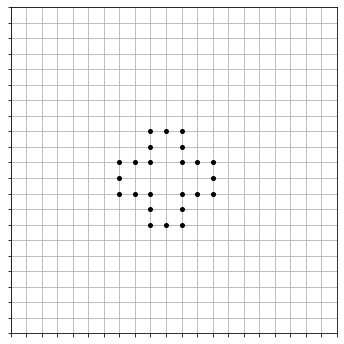

In [8]:
grid = Grid('cross4')
grid.print()

Note that `print()` takes various optional arguments 

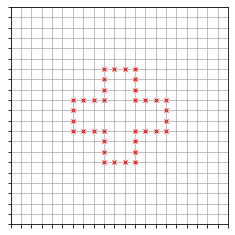

In [9]:
grid = Grid('cross')
grid.print(color='r',marker='x',size=4)

'Segments' can be added to a grid:

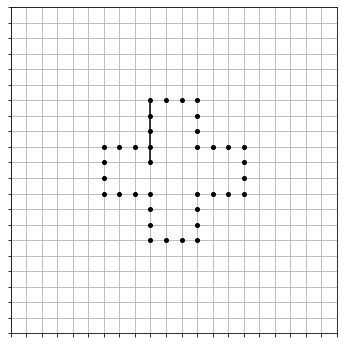

In [10]:
grid.addsegment((9, 11, 2, 0), 4)
grid.print()

One can also ask if a move is legal:

In [11]:
grid.islegalmove((13, 8, 3, 2), 4)

True

Obviously once a move has been made it is not legal to make it again:

In [12]:
grid.addsegment((13, 8, 3, 2), 4)
grid.islegalmove((13, 8, 3, 2), 4)

False

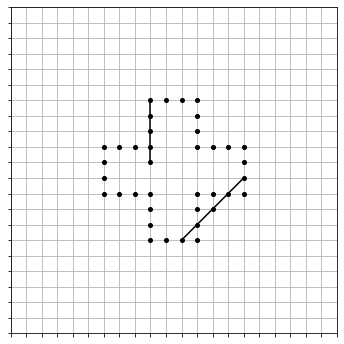

In [13]:
grid.print()

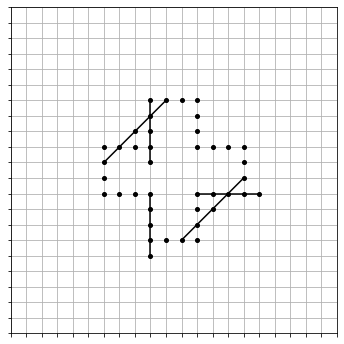

In [14]:
grid.addsegment((16, 9, 1, 4), 4)
grid.addsegment((8, 13, 3, 2), 4)
grid.addsegment((9, 5, 2, 0), 4)
grid.print()

The list of all legal moves for a given grid can be computed with `computelegalmoves`

In [15]:
len(grid.computelegalmoves(4))

22

In [16]:
len(Grid('cross').computelegalmoves(4))

28

In [17]:
len(Grid('pipe').computelegalmoves(4))

24

The `image()` of a grid is a 64x64 pixels PIL image that will be later used for deep learing

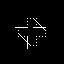

In [18]:
grid.image()

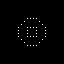

In [19]:
grid=Grid('pipe')
grid.image()

In fact, the goal of this project is to have a deep learning model that predicts the expected maximal score one can attain from a given image.

## Classes `Game`, `StartingGame`, and `PlayingGame`

A `Game` is a class whose attributes are:
- a set of rules, in particular the segment length `seglen'
- a Grid `grid'
- a list of allowed moves `moves'
- a `score`

In addition it has several methods such as:
- `print()` showing the current grid as well as other information

The class `Game` is an abstract class (contain some abstract method): it cannot be used directly. One must instead use of of its two child classes `StartingGame` or `PlayingGame`.

`StartingGame` can be initialized without arguments, or specifying a set of rules.

Instead, `PlayingGame` can only be initialized from an existing instance of `Game`

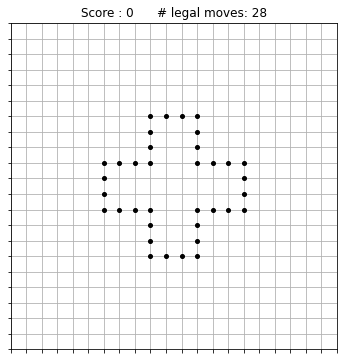

In [20]:
game = StartingGame()
game.print()

The method `play` allows to play a game, either until there are no more possible moves, or until a given `depth` is reached.

It takes as a argument a function that peforms the choice of a move among all the allowed moves.

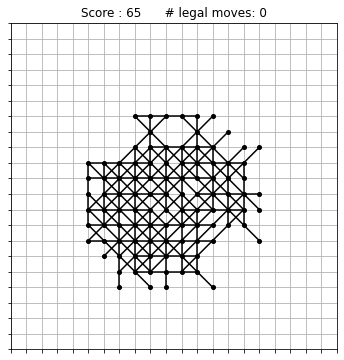

In [21]:
def pickfirst(game): return 0
endgame = game.play(pickfirst)
endgame.print()

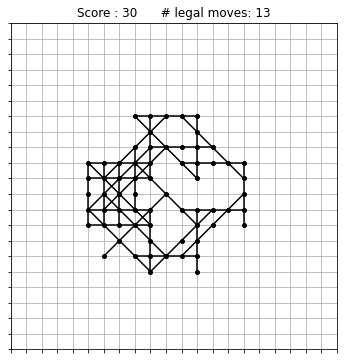

In [22]:
middlegame = game.play(pickfirst, depth = 30)
middlegame.print()

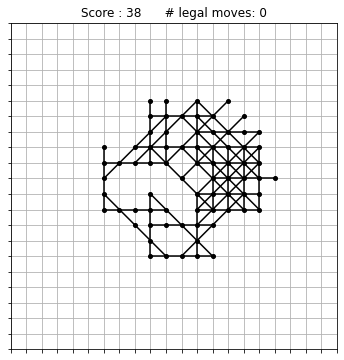

In [23]:
def picklast(game): return -1
endgame = game.play(picklast)
endgame.print()

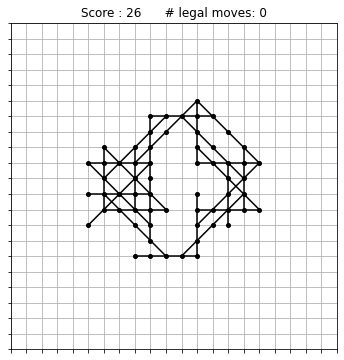

In [24]:
def pickatrandom(game): return np.random.randint(len(game.moves))
randomgame = game.play(pickatrandom)
randomgame.print()

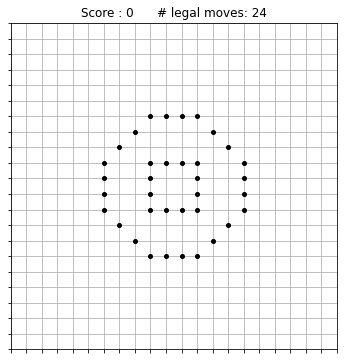

In [25]:
game = StartingGame('pipe')
game.print()

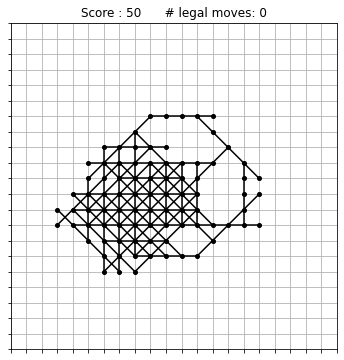

In [26]:
randomgame = game.play(pickatrandom)
randomgame.print()